In [24]:
import rebound
import reboundx
import numpy as np
tmax = 1.e6
taue = -1.e1
dt = 1.e-2
P = 2.3

In [13]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1.e-3,a=1.,e=0.1,f=0.3)
sim.add(m=1.e-3,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

sim.integrator="whfast"
sim.dt = ps[1].P*dt

E0 = sim.calculate_energy()
Nout = 1000
EerrNoDamp, e = np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    EerrNoDamp[i] = abs((Ef-E0)/E0)
    e[i] = sim.particles[1].e

CPU times: user 12 s, sys: 21.4 ms, total: 12.1 s
Wall time: 12.1 s


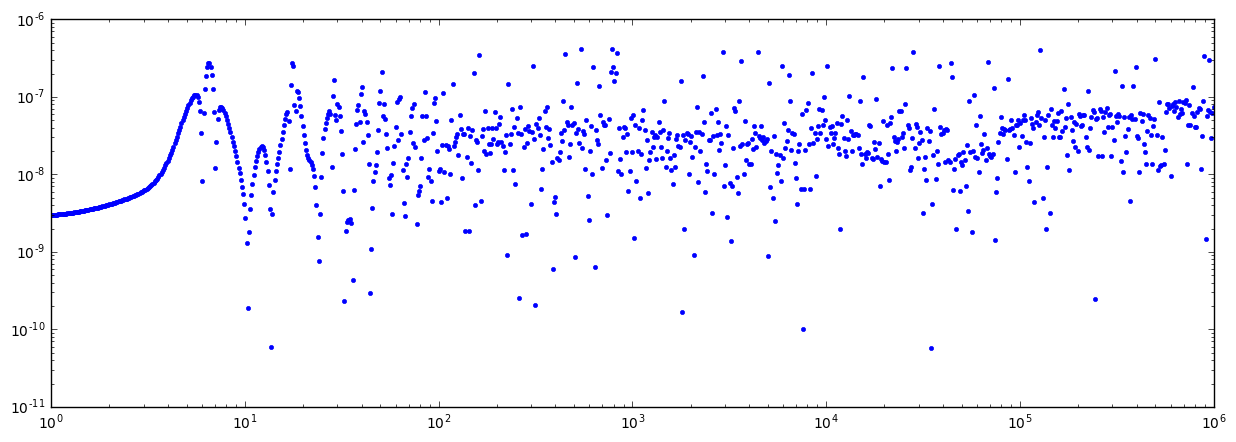

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,EerrNoDamp, '.')

In [25]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1.e-3,a=1.,e=0.1,f=0.3)
sim.add(m=1.e-3,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

rebx = reboundx.Extras(sim)
damping = rebx.add("modify_orbits_forces")

ps[1].params["tau_e"] = taue
ps[2].params["tau_e"] = taue

sim.integrator="whfast"
sim.dt = ps[1].P*dt

damping.params["Edissipated_WHFAST"] = 0.
E0 = sim.calculate_energy()
Nout = 1000
EerrWHFAST, eWHFAST, aWHFast = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
#e1,e2,inc1,inc2, Eerr = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
#a1,a2,inc1,inc2, Eerr = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    EerrWHFAST[i] = abs((Ef-(E0+damping.params["Edissipated_WHFAST"]))/E0)
    eWHFAST[i] = sim.particles[1].e
    aWHFast[i] = sim.particles[1].a

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/rebound/simulation.py:508: RuntimeWarning: REBOUNDx: Passing a velocity-dependent force to WHFAST. Need to apply as an operator.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 27.8 s, sys: 26.8 ms, total: 27.8 s
Wall time: 27.8 s


In [26]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1.e-3,a=1.,e=0.1,f=0.3)
sim.add(m=1.e-3,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

rebx = reboundx.Extras(sim)
damping = rebx.add("modify_orbits_forces")

ps[1].params["tau_e"] = taue
ps[2].params["tau_e"] = taue

sim.integrator="whfast"
sim.dt = ps[1].P*dt
print(sim.dt)
rebx.integrator="rk4"
damping.force_as_operator = 1
damping.operator_order = 1

damping.params["Edissipated"] = 0.
E0 = sim.calculate_energy()
Nout = 1000
Eerrrk4, erk4, ark4 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    Eerrrk4[i] = abs((Ef-(E0+damping.params["Edissipated"]))/E0)
    erk4[i] = sim.particles[1].e
    ark4[i] = sim.particles[1].a

0.06280046068758707
CPU times: user 41.5 s, sys: 42.6 ms, total: 41.6 s
Wall time: 41.6 s


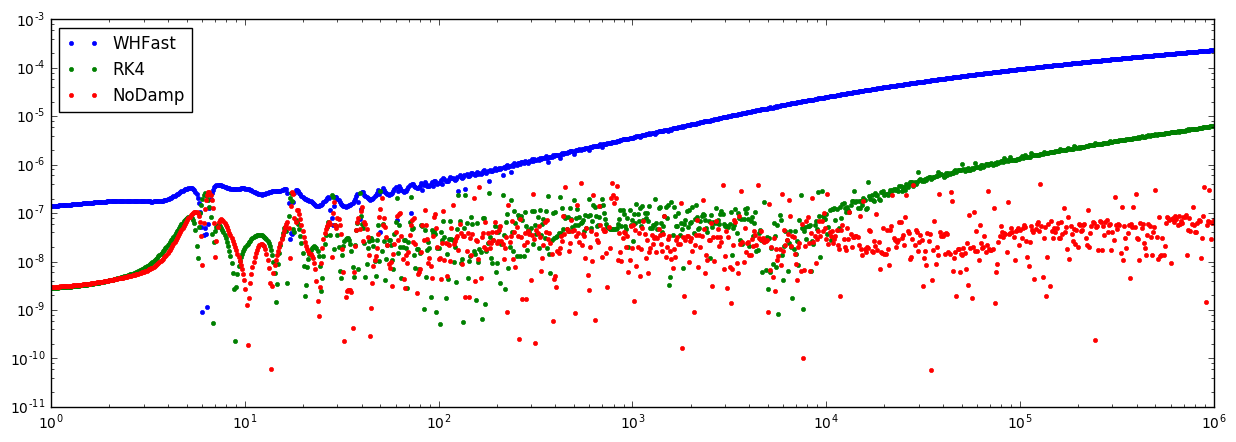

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,EerrWHFAST, '.', label='WHFast')
ax.plot(times,Eerrrk4, '.', label='RK4')
ax.plot(times,EerrNoDamp, '.', label='NoDamp')
ax.legend(loc='upper left')

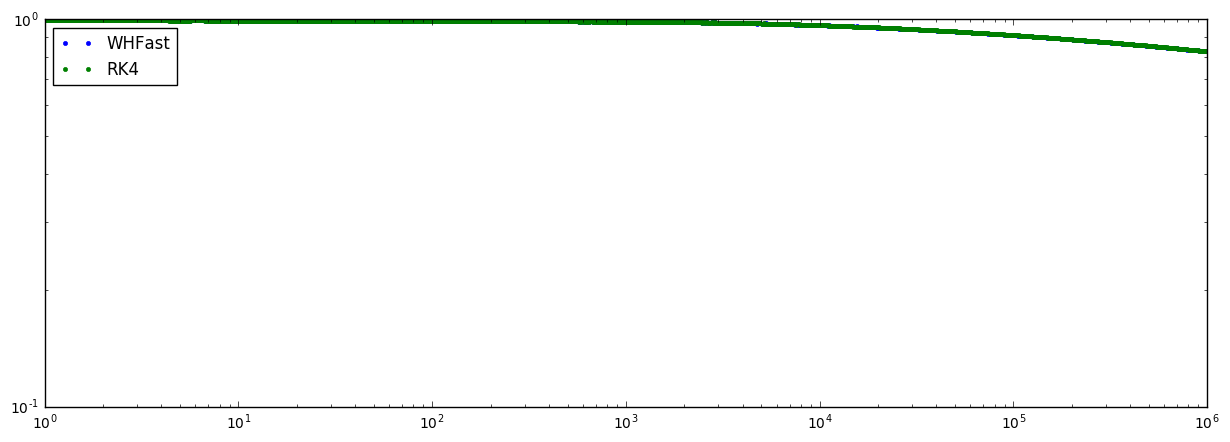

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,aWHFast, '.', label='WHFast')
ax.plot(times,ark4, '.', label='RK4')
ax.legend(loc='upper left')

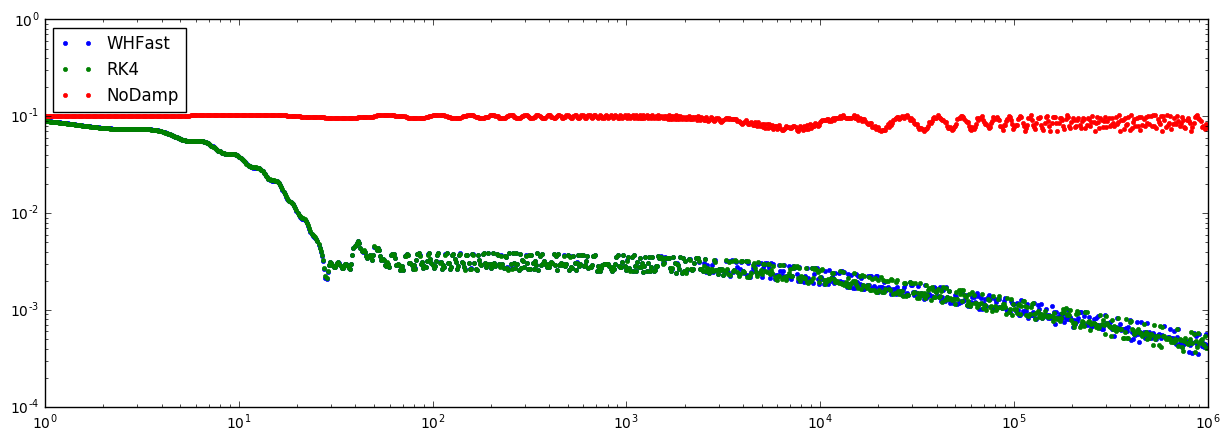

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,eWHFAST, '.', label='WHFast')
ax.plot(times,erk4, '.', label='RK4')
ax.plot(times,e, '.', label='NoDamp')
ax.legend(loc='upper left')

In [6]:
import rebound
import reboundx
import numpy as np
tmax = 1.e6
taua = -1.e6
dt = 1.e-2
P = 2.3
m=1.e-10

In [7]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=m,a=1.,e=0.1,f=0.3)
sim.add(m=m,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

rebx = reboundx.Extras(sim)
damping = rebx.add("modify_orbits_forces")

ps[1].params["tau_a"] = taua
ps[2].params["tau_a"] = taua

sim.integrator="whfast"
sim.dt = ps[1].P*dt

damping.params["Edissipated_WHFAST"] = 0.
E0 = sim.calculate_energy()
Nout = 1000
EerrWHFAST, eWHFAST, aWHFast = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
#e1,e2,inc1,inc2, Eerr = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
#a1,a2,inc1,inc2, Eerr = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    EerrWHFAST[i] = abs((Ef-(E0+damping.params["Edissipated_WHFAST"]))/E0)
    eWHFAST[i] = sim.particles[1].e
    aWHFast[i] = sim.particles[1].a

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/rebound/simulation.py:508: RuntimeWarning: REBOUNDx: Passing a velocity-dependent force to WHFAST. Need to apply as an operator.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 28.8 s, sys: 30.3 ms, total: 28.8 s
Wall time: 28.8 s


In [8]:
%%time
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=m,a=1.,e=0.1,f=0.3)
sim.add(m=m,P=P*sim.particles[1].P,e=0.1,f=3.8)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

rebx = reboundx.Extras(sim)
damping = rebx.add("modify_orbits_forces")

ps[1].params["tau_a"] = taua
ps[2].params["tau_a"] = taua

sim.integrator="whfast"
sim.dt = ps[1].P*dt
print(sim.dt)
rebx.integrator="rk4"
damping.force_as_operator = 1
damping.operator_order = 1

damping.params["Edissipated"] = 0.
E0 = sim.calculate_energy()
Nout = 1000
Eerrrk4, erk4, ark4 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    Eerrrk4[i] = abs((Ef-(E0+damping.params["Edissipated"]))/E0)
    erk4[i] = sim.particles[1].e
    ark4[i] = sim.particles[1].a

0.06283185306865423
CPU times: user 41.2 s, sys: 128 ms, total: 41.3 s
Wall time: 41.3 s


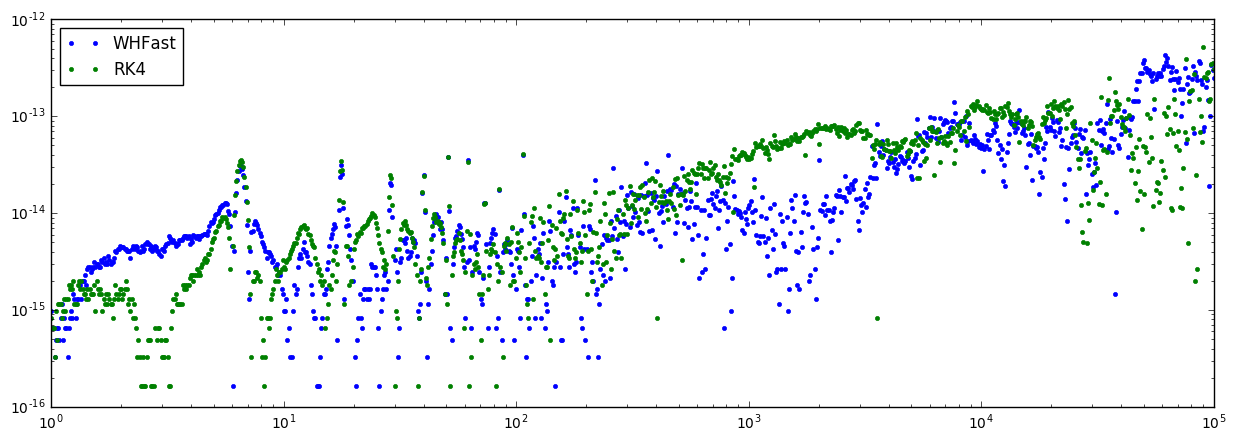

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,EerrWHFAST, '.', label='WHFast')
ax.plot(times,Eerrrk4, '.', label='RK4')
#ax.plot(times,EerrNoDamp, '.', label='NoDamp')
ax.legend(loc='upper left')

In [59]:
sim.particles[1].a

0.36787977247551384